In [8]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [9]:
#for import data set from kaggle directly
!kaggle datasets download -d sabari50312/fundus-pytorch

100% 3.81G/3.82G [03:21<00:00, 20.6MB/s]
100% 3.82G/3.82G [03:21<00:00, 20.3MB/s]


In [10]:
 #for unzip the file
 import zipfile
 zip_ref = zipfile.ZipFile('/content/GlaucoData.zip','r')
 zip_ref.extractall('/content')
 zip_ref.close()

In [23]:
 #importing neccesaary libraries
 import tensorflow as tf
 from tensorflow import keras
 from keras import Sequential
 from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [24]:
#generators-useful to process large amount of data - in batches
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)


Found 8621 files belonging to 2 classes.
Found 2874 files belonging to 2 classes.


In [25]:
#Normalization
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

  train_ds = train_ds.map(process)
  validation_ds = validation_ds.map(process)

In [26]:
# Create CNN model with - 3 convolution layer with filter 32,64,128
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3))) #1st convoution layer
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid')) #pooling layer
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu')) #2nd convoution layer
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid')) #pooling layer
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu')) #3rd convoution layer
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid')) #pooling layer

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [28]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [29]:
#training the model
history=model.fit(train_ds , epochs=10, validation_data=validation_ds)

Epoch 1/10
270/270 [==============================] - 81s 278ms/step - loss: 1.5079 - accuracy: 0.6802 - val_loss: 0.5810 - val_accuracy: 0.7244
Epoch 2/10
270/270 [==============================] - 76s 274ms/step - loss: 0.6169 - accuracy: 0.6865 - val_loss: 0.5707 - val_accuracy: 0.7255
Epoch 3/10
270/270 [==============================] - 76s 278ms/step - loss: 0.5943 - accuracy: 0.7101 - val_loss: 0.5485 - val_accuracy: 0.7429
Epoch 4/10
270/270 [==============================] - 76s 275ms/step - loss: 0.5674 - accuracy: 0.7352 - val_loss: 0.5540 - val_accuracy: 0.7568
Epoch 5/10
270/270 [==============================] - 74s 270ms/step - loss: 0.5665 - accuracy: 0.7273 - val_loss: 0.5673 - val_accuracy: 0.7296
Epoch 6/10
270/270 [==============================] - 74s 268ms/step - loss: 0.5526 - accuracy: 0.7378 - val_loss: 0.5286 - val_accuracy: 0.7571
Epoch 7/10
270/270 [==============================] - 75s 271ms/step - loss: 0.5484 - accuracy: 0.7476 - val_loss: 0.5149 - val_ac

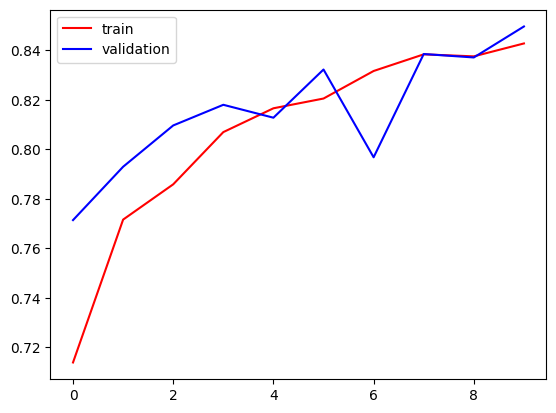

In [20]:
#graph for checking accuracy of trainning and validation
#old graph - before batchnormalization and dropout
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

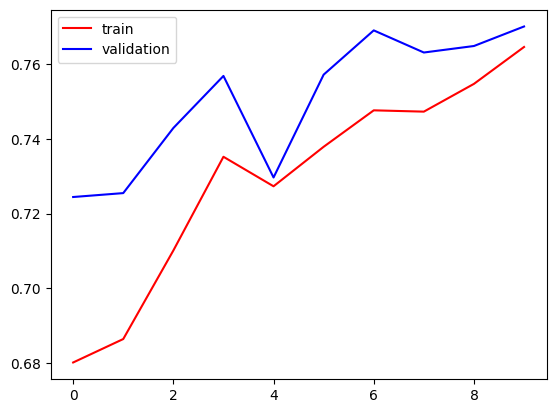

In [30]:
#graph for checking accuracy of trainning and validation
#New graph - after batchnormalization and dropout
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

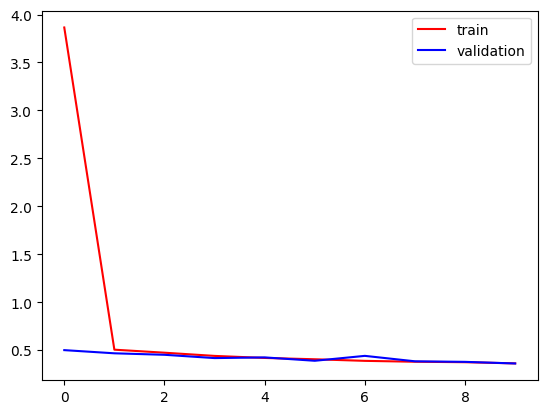

In [21]:
#graph for validation loss and training loss
#old graph - before batchnormalization and dropout
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

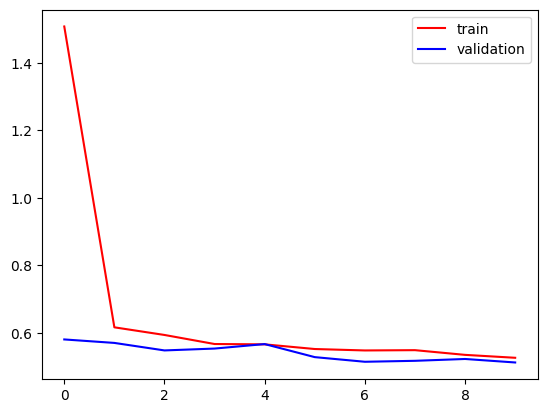

In [31]:
#graph for validation loss and training loss
#New graph - after batchnormalization and dropout
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# How to reduce issue of overfitting

# Add more data
# Data Augmentation -> means creating more data using existing data
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

# so we use Dropout and batch norm here
#to fill the little gap of accuracy

In [68]:
#prediction on model for checking its working
import cv2

In [69]:
test_img = cv2.imread('/content/GP1.png')


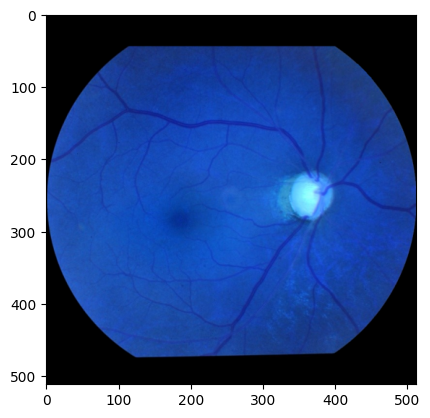

In [70]:
plt.imshow(test_img)

In [71]:
#checking the shape of img
test_img.shape

(512, 512, 3)

In [72]:
#reshape the image
test_img = cv2.resize(test_img,(256,256))

In [73]:
test_input = test_img.reshape((1,256,256,3))

In [74]:
model.predict(test_input)

1/1 [==============================] - 0s 17ms/step


array([[1.]], dtype=float32)